## Simplified hypothesis

$$H(x) = Wx$$
$$cost(W) = \frac{1}{m}\sum\limits_{i=1}^m (Wx^{(i)}) - y^{(i)})^2$$

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

# tf Graph Input
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(X)

# Set modle weights
W = tf.placeholder(tf.float32)

$H(x) = Wx$

In [2]:
# Construct a linear modle
hypothesis = tf.mul(X, W)

$cost(W) = \frac{1}{m}\sum\limits_{i=1}^m (Wx^{(i)}) - y^{(i)})^2$

In [3]:
# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis - Y, 2)) / (m)

In [4]:
# Initalizing the variables
init = tf.global_variables_initializer()

기록을 위한 변수를 만듦

In [5]:
# For graphs
W_val = []
cost_val = []

In [6]:
# Launch the graph
sess = tf.Session()
sess.run(init)
for i in range(-30, 50) :
    # -3에서 5까지 0.1 단위로 돎
    print (i * 0.1, sess.run(cost, feed_dict={W: i * 0.1}))
    W_val.append(i * 0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i * 0.1}))

-3.0 74.6667
-2.9000000000000004 70.98
-2.8000000000000003 67.3867
-2.7 63.8867
-2.6 60.48
-2.5 57.1667
-2.4000000000000004 53.9467
-2.3000000000000003 50.82
-2.2 47.7867
-2.1 44.8467
-2.0 42.0
-1.9000000000000001 39.2467
-1.8 36.5867
-1.7000000000000002 34.02
-1.6 31.5467
-1.5 29.1667
-1.4000000000000001 26.88
-1.3 24.6867
-1.2000000000000002 22.5867
-1.1 20.58
-1.0 18.6667
-0.9 16.8467
-0.8 15.12
-0.7000000000000001 13.4867
-0.6000000000000001 11.9467
-0.5 10.5
-0.4 9.14667
-0.30000000000000004 7.88667
-0.2 6.72
-0.1 5.64667
0.0 4.66667
0.1 3.78
0.2 2.98667
0.30000000000000004 2.28667
0.4 1.68
0.5 1.16667
0.6000000000000001 0.746667
0.7000000000000001 0.42
0.8 0.186667
0.9 0.0466667
1.0 0.0
1.1 0.0466667
1.2000000000000002 0.186667
1.3 0.42
1.4000000000000001 0.746666
1.5 1.16667
1.6 1.68
1.7000000000000002 2.28667
1.8 2.98667
1.9000000000000001 3.78
2.0 4.66667
2.1 5.64667
2.2 6.72
2.3000000000000003 7.88667
2.4000000000000004 9.14667
2.5 10.5
2.6 11.9467
2.7 13.4867
2.8000000000000

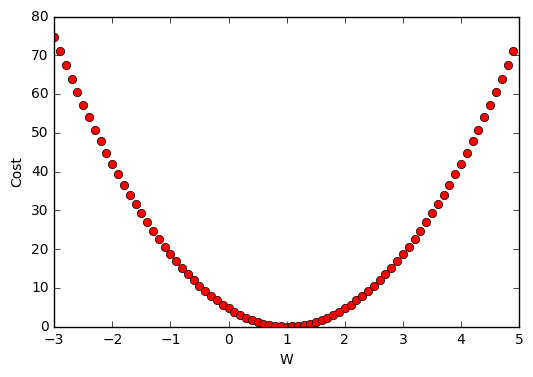

In [7]:
# Graphic display
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

## Placeholder

$$W := W - \alpha\frac{1}{m}\sum\limits_{i=1}^m (W(x^{(i)}) - y^{(i)})x^{(i)}$$

$\alpha$
 * step의 크기
 * 얼만큼 내려갈것인가?
 
$(W(x^{(i)}) - y^{(i)})x^{(i)}$
 * 함수를 미분한 값
 * 기울기 값

In [8]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

In [9]:
# Try to find values for W and b that cmpute y_dta = W * x_data + b
# (We know that W should be 1 and b 0, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis
hypothesis = W * X

In [10]:
# Simplified cost function
cost = tf. reduce_mean(tf.square(hypothesis - Y))

$W := W - \alpha\frac{1}{m}\sum\limits_{i=1}^m (W(x^{(i)}) - y^{(i)})x^{(i)}$

In [12]:
descent = W - tf.mul(0.1, tf.reduce_mean(tf.mul((tf.mul(W, X) - Y), X)))

실제 업데이트를 하는것이아니라 수식만 가지고 있음.
실제 없데이트는 run을 해야함

In [13]:
update = W.assign(descent)

In [14]:
# Before stating, initialize the variables, We will 'run' this first.
init = tf.global_variables_initializer()

In [15]:
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(101):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    if (step % 5 == 0) :
        print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 71.1188 [ 4.90381241]
5 0.132425 [ 1.16845441]
10 0.000246582 [ 1.00726902]
15 4.58984e-07 [ 1.00031364]
20 8.6186e-10 [ 1.00001359]
25 1.80478e-12 [ 1.0000006]
30 0.0 [ 1.]
35 0.0 [ 1.]
40 0.0 [ 1.]
45 0.0 [ 1.]
50 0.0 [ 1.]
55 0.0 [ 1.]
60 0.0 [ 1.]
65 0.0 [ 1.]
70 0.0 [ 1.]
75 0.0 [ 1.]
80 0.0 [ 1.]
85 0.0 [ 1.]
90 0.0 [ 1.]
95 0.0 [ 1.]
100 0.0 [ 1.]


$W$가 1, $cost$가 0이 이됨  
=> 답을 찾음